In [1]:
import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

from model import *

In [2]:
from data import *

Size of dataframe 0 is (64185, 9)
Size of dataframe 1 is (63204, 9)
Size of dataframe 2 is (48597, 9)
Size of dataframe 3 is (64454, 9)
April_8 data has been read
Size of dataframe 0 is (65571, 9)
Size of dataframe 1 is (64568, 9)
Size of dataframe 2 is (65350, 9)
Size of dataframe 3 is (66627, 9)
April_9 data has been read
Size of dataframe 0 is (65571, 9)
Size of dataframe 1 is (64568, 9)
Size of dataframe 2 is (65350, 9)
Size of dataframe 3 is (66627, 9)
April_10 data has been read
Size of dataframe 0 is (49762, 9)
Size of dataframe 1 is (61376, 9)
Size of dataframe 2 is (59725, 9)
Size of dataframe 3 is (61151, 9)
April_11 data has been read


In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def get_cf_matrix(model, X_test, y_test, threshold):
    pred = model(X_test.to(DEVICE))
    pred_rounded = np.where(pred.cpu().detach().numpy() > threshold, 1, 0)
    # torch.sum(torch.from_numpy(pred_rounded) == y_test).item() / y_test.shape[0] # accuracy
    cf_matrix = confusion_matrix(y_test.cpu().detach(), torch.from_numpy(pred_rounded))
    return cf_matrix

In [4]:
def plot_cf_plots(cf_matrices, dates, file_name = None):

    plot_size = (2,2)

    fig, axs = plt.subplots(plot_size[0], plot_size[1], figsize=(plot_size[1] * 3.4 + 0.1 * plot_size[1] , plot_size[0] * 3.4 + 0.1 * plot_size[0]))

    i = 0
    for j in range(plot_size[0]):
        for k in range(plot_size[1]):
            
            curr_axs = axs[j, k]
            ConfusionMatrixDisplay(cf_matrices[i]).plot(ax=curr_axs, colorbar= False)
            curr_axs.set_title(dates[i].replace("_", " "))
            if k == 1:
                curr_axs.set_ylabel(None)
            if j == 0:
                curr_axs.set_xlabel(None)
    
            i += 1
        
    if file_name != None:
        plt.savefig(file_name, bbox_inches="tight")

    plt.show()

In [5]:
# DATES = ["April_8", "April_9", "April_10", "April_11"]
cf_matrices = []
cnn_models = []
for d_ind in range(4):
    X_train, X_valid, X_test, y_train, y_valid, y_test, _, _ = preprocess_one_day_data(d_ind, WINDOW_SIZE, VALID_PER, TEST_PER, True, False)

    cnn_model, cnn_losses = grid_search_cnn_control(X_train, X_valid, y_train, y_valid, THRESHOLD)
    cnn_models.append(cnn_models)

    cf_matrix = get_cf_matrix(cnn_model, X_test, y_test, THRESHOLD)
    cf_matrices.append(cf_matrix)

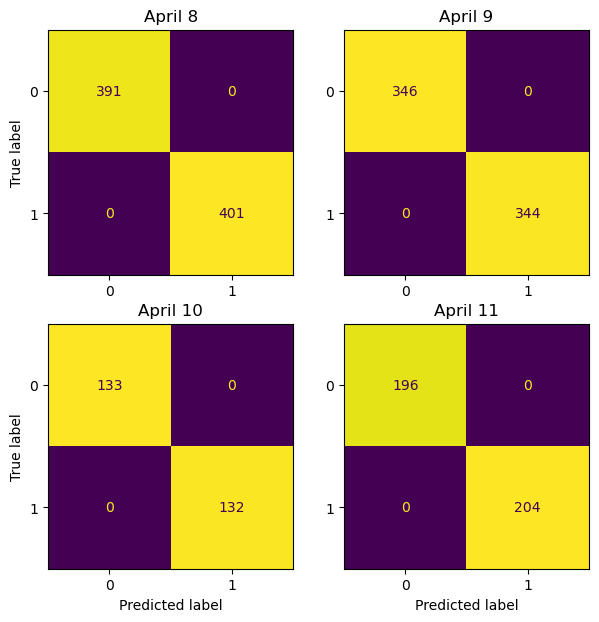

In [8]:
plot_cf_plots(cf_matrices, DATES, "cf_cnn.png")